# 🔍 Clustering Visualization: Iris & Gaussian Mixture Datasets

This notebook demonstrates various clustering visualization techniques on two datasets:
- **Iris dataset** (real-world)
- **Simulated Gaussian Mixture Model** (synthetic)

### Included Visualizations:
- 2D & 3D scatter plots
- Cluster heatmaps
- Elbow & Gap statistic methods
- Dendrograms (for hierarchical clustering)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import scipy
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Iris dataset
iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data)
y_iris = iris.target
iris_df = pd.DataFrame(X_iris, columns=iris.feature_names)

In [3]:
# Simulated Gaussian Mixture Dataset
X_blob, y_blob = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
X_blob = StandardScaler().fit_transform(X_blob)
blob_df = pd.DataFrame(X_blob, columns=['Feature 1', 'Feature 2'])

## 📌 2D & 3D Scatter Plots

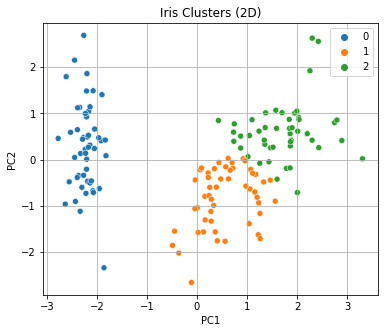

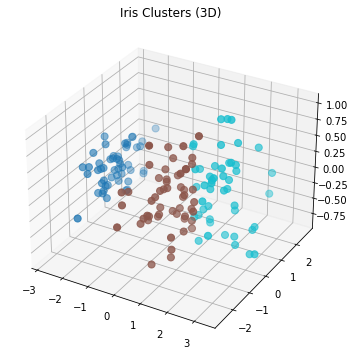

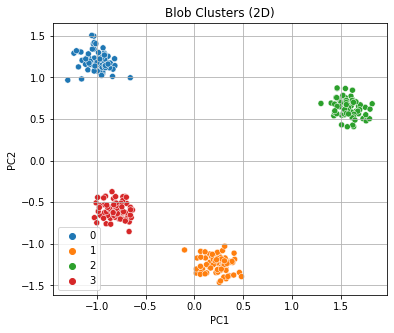

In [9]:
# Apply PCA for 2D & 3D visualization
def scatter_plot_2d(X, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='tab10')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.show()

# 3D version
from mpl_toolkits.mplot3d import Axes3D
def scatter_plot_3d(X, labels, title):
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels, cmap='tab10', s=50)
    ax.set_title(title)
    plt.show()

# Apply KMeans
kmeans_iris = KMeans(n_clusters=3).fit(X_iris)
scatter_plot_2d(X_iris, kmeans_iris.labels_, 'Iris Clusters (2D)')
scatter_plot_3d(X_iris, kmeans_iris.labels_, 'Iris Clusters (3D)')

kmeans_blob = KMeans(n_clusters=4).fit(X_blob)
scatter_plot_2d(X_blob, kmeans_blob.labels_, 'Blob Clusters (2D)')
#scatter_plot_3d(X_blob, kmeans_blob.labels_, 'Blob Clusters (3D)')

## 🔥 Cluster Heatmaps

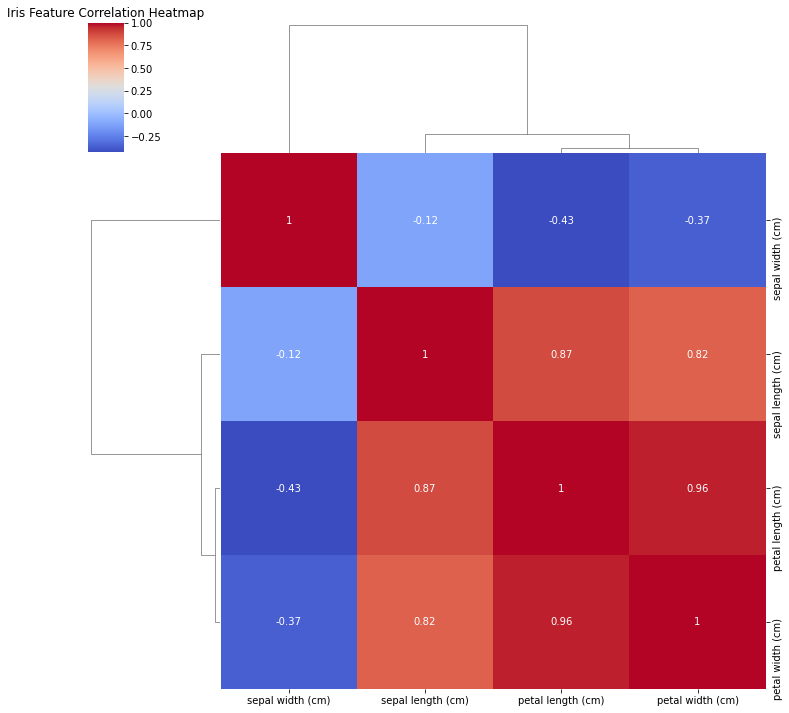

In [5]:
# Cluster heatmap
sns.clustermap(iris_df.corr(), cmap='coolwarm', annot=True)
plt.title('Iris Feature Correlation Heatmap')
plt.show()

## 📈 Elbow and Gap Statistic Methods

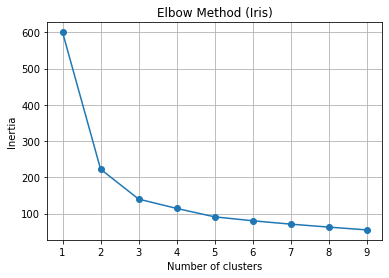

In [6]:
# Elbow method
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42).fit(X_iris)
    inertia.append(km.inertia_)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method (Iris)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

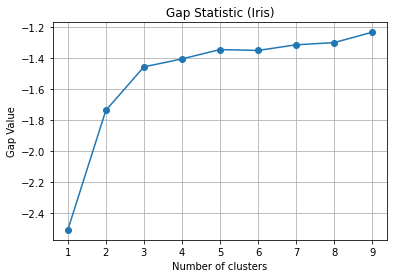

In [7]:
# Gap statistic function
def gap_statistic(X, refs=None, n_refs=10, max_k=10):
    shape = X.shape
    gaps = []
    for k in range(1, max_k+1):
        km = KMeans(n_clusters=k, random_state=42).fit(X)
        orig_disp = np.log(km.inertia_)
        ref_disps = []
        for _ in range(n_refs):
            random_ref = np.random.random_sample(shape)
            km_ref = KMeans(n_clusters=k, random_state=42).fit(random_ref)
            ref_disps.append(np.log(km_ref.inertia_))
        gap = np.mean(ref_disps) - orig_disp
        gaps.append(gap)
    return gaps

gaps = gap_statistic(X_iris, n_refs=5, max_k=9)
plt.plot(range(1, 10), gaps, marker='o')
plt.title('Gap Statistic (Iris)')
plt.xlabel('Number of clusters')
plt.ylabel('Gap Value')
plt.grid(True)
plt.show()

## 🌿 Dendrograms (Hierarchical Clustering)

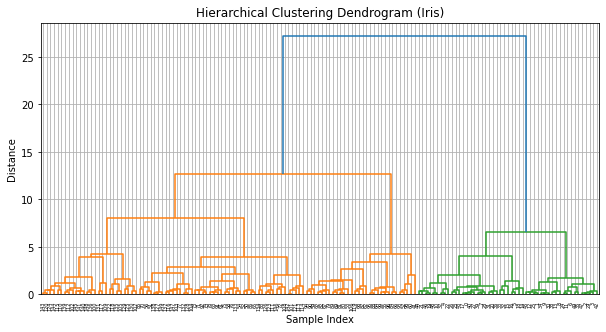

In [8]:
linked = linkage(X_iris, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Iris)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()